In [1]:
import pandas as pd
import numpy as np

In [2]:
#impoot files
machines = pd.read_csv('data/machines.csv')
errors = pd.read_csv('data/errors.csv')
failures = pd.read_csv('data/failures.csv')
data = pd.read_csv('data/telemetry.csv')
maintenances = pd.read_csv('data/maint.csv')

In [3]:
one_hot = pd.get_dummies(failures['failure'])
failures = failures.join(one_hot)

In [4]:
one_hot = pd.get_dummies(errors['errorID'])
errors = errors.join(one_hot)
maintenances

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
...,...,...,...
3281,2015-10-10 06:00:00,100,comp3
3282,2015-10-25 06:00:00,100,comp4
3283,2015-11-09 06:00:00,100,comp4
3284,2015-12-09 06:00:00,100,comp2


In [5]:
maintenances.loc[maintenances.comp == "comp1", "comp"] = "maintComp1"
maintenances.loc[maintenances.comp == "comp2", "comp"] = "maintComp2"
maintenances.loc[maintenances.comp == "comp3", "comp"] = "maintComp3"
maintenances.loc[maintenances.comp == "comp4", "comp"] = "maintComp4"
one_hot = pd.get_dummies(maintenances['comp'])
maintenances = maintenances.join(one_hot)

In [6]:
errors = errors.drop('errorID',axis=1)
failures = failures.drop('failure',axis=1)
maintenances = maintenances.drop('comp',axis=1)

In [7]:
errors = errors.groupby(['machineID','datetime']).max()
failures = failures.groupby(['machineID','datetime']).max()
maintenances = maintenances.groupby(['machineID','datetime']).max()

In [8]:
errors = errors.reset_index()
failures = failures.reset_index()
maintenances = maintenances.reset_index()

In [9]:
failures['datetime'] = failures['datetime'].apply(pd.to_datetime)
errors['datetime'] = errors['datetime'].apply(pd.to_datetime)
data['datetime'] = data['datetime'].apply(pd.to_datetime)
maintenances['datetime'] = maintenances['datetime'].apply(pd.to_datetime)

In [10]:

machines = machines.drop('model',axis=1)
test = pd.merge(data,machines,on=['machineID'])
test = pd.merge(test,errors,how = 'left' , on=['datetime','machineID'])
test['error1'] = test['error1'].fillna(0)
test['error2'] = test['error2'].fillna(0)
test['error3'] = test['error3'].fillna(0)
test['error4'] = test['error4'].fillna(0)
test['error5'] = test['error5'].fillna(0)
test = pd.merge(test,failures,how = 'left' , on=['datetime','machineID'])
test['comp1'] = test['comp1'].fillna(0)
test['comp2'] = test['comp2'].fillna(0)
test['comp3'] = test['comp3'].fillna(0)
test['comp4'] = test['comp4'].fillna(0)
maintenances = maintenances[maintenances['datetime'] >= '2015']
test = pd.merge(test,maintenances,how = 'left' , on=['datetime','machineID'])
test['maintComp1'] = test['maintComp1'].fillna(0)
test['maintComp2'] = test['maintComp2'].fillna(0)
test['maintComp3'] = test['maintComp3'].fillna(0)
test['maintComp4'] = test['maintComp4'].fillna(0)

In [11]:
test

,datetime,machineID,volt,rotate,pressure,vibration,age,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,maintComp1,maintComp2,maintComp3,maintComp4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df = test

In [13]:
df['comp1_fails_in_aday'] = df['comp1'] 
day = 24
for i in range(0, len(df)):
  if(df.iloc[i,12]== 1):
    id = df.iloc[i,1]
    for j in range(i , max(-1,i-day) , -1):
      if(id != df.iloc[j,1]):
        break
      df.at[j, 'comp1_fails_in_aday'] = 1
df['comp2_fails_in_aday'] = df['comp2'] 
day = 24
for i in range(0, len(df)):
  if(df.iloc[i,13]== 1):
    id = df.iloc[i,1]
    for j in range(i , max(-1,i-day) , -1):
      if(id != df.iloc[j,1]):
        break
      df.at[j, 'comp2_fails_in_aday'] = 1
df['comp3_fails_in_aday'] = df['comp3'] 
day = 24
for i in range(0, len(df)):
  if(df.iloc[i,14]== 1):
    id = df.iloc[i,1]
    for j in range(i , max(-1,i-day) , -1):
      if(id != df.iloc[j,1]):
        break
      df.at[j, 'comp3_fails_in_aday'] = 1
df['comp4_fails_in_aday'] = df['comp4'] 
day = 24
for i in range(0, len(df)):
  if(df.iloc[i,15]== 1):
    id = df.iloc[i,1]
    for j in range(i , max(-1,i-day) , -1):
      if(id != df.iloc[j,1]):
        break
      df.at[j, 'comp4_fails_in_aday'] = 1
       

In [14]:
features_col_name=['volt' , 'rotate' , 'pressure' , 'vibration' ,	'age'  , 'error1', 'error2' , 'error3' , 'error4' , 'maintComp1', 'maintComp2','maintComp3' , 'maintComp4']
target_col_day=['comp1_fails_in_aday','comp2_fails_in_aday','comp3_fails_in_aday','comp4_fails_in_aday']

In [15]:
train = pd.DataFrame(columns = df.columns)
test = pd.DataFrame(columns = df.columns)

In [16]:
from sklearn.preprocessing import MinMaxScaler
for i in range(1,101):
  k = df[df['machineID'] == i][:6503]
  train = train.append(k)
  k = df[df['machineID'] == i][6503:]
  test = test.append(k)

sc=MinMaxScaler()
train[features_col_name]=sc.fit_transform(train[features_col_name])
test[features_col_name]=sc.transform(test[features_col_name])

In [17]:
seq_cols=features_col_name
def gen_sequence(id_df, seq_length, seq_cols):
    df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    id_df=df_zeros.append(id_df,ignore_index=True)
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        lstm_array.append(data_array[start:stop, :])
    return np.array(lstm_array)

# function to generate labels
def gen_label(id_df, seq_length, seq_cols,labels):
    df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    id_df=df_zeros.append(id_df,ignore_index=True)
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    y_label=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        y_label.append([id_df[labels[0]][stop],id_df[labels[1]][stop],id_df[labels[2]][stop],id_df[labels[3]][stop]])
    return np.array(y_label)

In [18]:
# generate X_train
X_train=np.concatenate(list(list(gen_sequence(train[train['machineID']==id], day, seq_cols)) for id in train['machineID'].unique()))
print(X_train.shape)
# generate y_train
y_train=np.concatenate(list(list(gen_label(train[train['machineID']==id], day, seq_cols,target_col_day)) for id in train['machineID'].unique()))
print(y_train.shape)
# generate X_test
X_test=np.concatenate(list(list(gen_sequence(test[test['machineID']==id], day, seq_cols)) for id in test['machineID'].unique()))
print(X_test.shape)
# generate y_test
y_test=np.concatenate(list(list(gen_label(test[test['machineID']==id], day, seq_cols,target_col_day)) for id in test['machineID'].unique()))
print(y_test.shape)
y_train = list(np.transpose(y_train))
y_test = list(np.transpose(y_test))

(650200, 24, 13)
(650200, 4)
(225700, 24, 13)
(225700, 4)


In [19]:
from keras.models import Model
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
class UtkMultiOutputModel():
    def make_default_hidden_layers(self, inputs):
        x = LSTM(units=200,return_sequences=True)(inputs)
        x = Dropout(0.2)(x)
        x = LSTM(units=200,return_sequences=False)(inputs)
        x = Dropout(0.2)(x)
        return x
    def build_comp1_branch(self, inputs):
        x = self.make_default_hidden_layers(inputs)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="comp1")(x)
        return x
    def build_comp2_branch(self, inputs):
        x = self.make_default_hidden_layers(inputs)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="comp2")(x)
        return x
    def build_comp3_branch(self, inputs):   
        x = self.make_default_hidden_layers(inputs)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="comp3")(x)
        return x

    def build_comp4_branch(self, inputs):   
        x = self.make_default_hidden_layers(inputs)
        x = Dense(1)(x)
        x = Activation("sigmoid", name="comp4")(x)
        return x
    def assemble_full_model(self, timestamp, nb_features):
        input_shape=(timestamp, nb_features)
        inputs = Input(shape=input_shape)
        branch1 = self.build_comp1_branch(inputs)
        branch2 = self.build_comp2_branch(inputs)
        branch3 = self.build_comp3_branch(inputs)
        branch4 = self.build_comp4_branch(inputs)
        model = Model(inputs=inputs,
                     outputs = [branch1,branch2,branch3,branch4],
                     name="failure")
        return model
nb_features =X_train.shape[2]
timestamp=day

    
model = UtkMultiOutputModel().assemble_full_model(timestamp,nb_features)


In [20]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


model.compile(optimizer='adam', 
              loss={
                  'comp1': 'binary_crossentropy',
                  'comp2': 'binary_crossentropy',
                  'comp3': 'binary_crossentropy', 
                  'comp4': 'binary_crossentropy'},
              loss_weights={
                  'comp1': 0.1,
                  'comp2': 0.1,
                  'comp3': 0.1, 
                  'comp4': 0.1},
              metrics={
                  'comp1': 'accuracy',
                  'comp2': 'accuracy',
                  'comp3': 'accuracy',
                  'comp4': 'accuracy'},)

model.fit(X_train, y_train, epochs=1, batch_size=100, validation_split=0.2) 
# kept epoch=1 for the time effectiveness of this notebook run

5202/5202 [==============================] - 884s 169ms/step - loss: 0.0111 - comp1_loss: 0.0284 - comp2_loss: 0.0402 - comp3_loss: 0.0205 - comp4_loss: 0.0214 - comp1_accuracy: 0.9947 - comp2_accuracy: 0.9929 - comp3_accuracy: 0.9968 - comp4_accuracy: 0.9949 - val_loss: 0.0081 - val_comp1_loss: 0.0097 - val_comp2_loss: 0.0393 - val_comp3_loss: 0.0138 - val_comp4_loss: 0.0182 - val_comp1_accuracy: 0.9981 - val_comp2_accuracy: 0.9928 - val_comp3_accuracy: 0.9937 - val_comp4_accuracy: 0.9949


In [21]:
model.summary()

Model: "failure"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 13)]     0           []                               
                                                                                                  
 lstm_1 (LSTM)                  (None, 200)          171200      ['input_1[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 200)          171200      ['input_1[0][0]']                
                                                                                                  
 lstm_5 (LSTM)                  (None, 200)          171200      ['input_1[0][0]']                
                                                                                            

In [22]:
y_pred = np.array(model.predict(X_test))

In [23]:
y_pred_comp1 = y_pred[0].flatten()
y_pred_comp2 = y_pred[1].flatten()
y_pred_comp3 = y_pred[2].flatten()
y_pred_comp4 = y_pred[3].flatten()

In [24]:
y_true_comp1 = y_test[0].flatten()
y_true_comp2 = y_test[1].flatten()
y_true_comp3 = y_test[2].flatten()
y_true_comp4 = y_test[3].flatten()

In [25]:
y_pred_classes_comp1= np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred_comp1)))
y_pred_classes_comp2= np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred_comp2)))
y_pred_classes_comp3= np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred_comp3)))
y_pred_classes_comp4= np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred_comp4)))

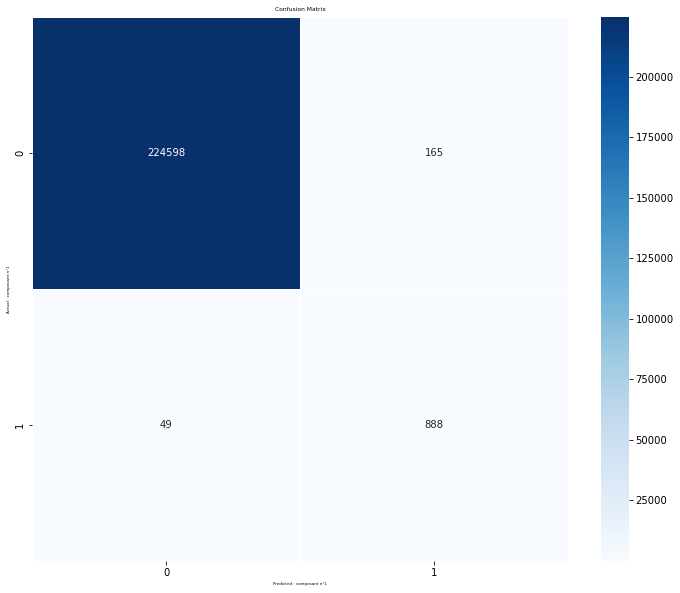

Accuracy :  0.9990518387239699
Recall :  0.9477054429028815
Precision :  0.8433048433048433
F1 score :  0.892462311557789


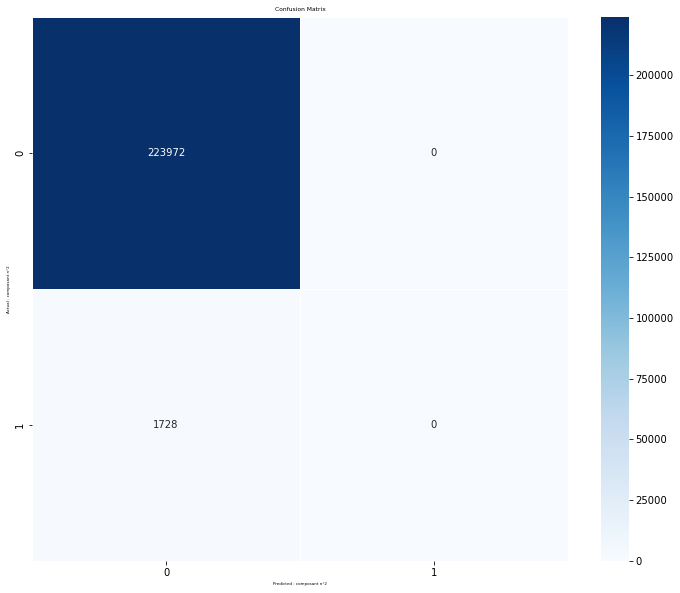

Accuracy :  0.9923438192290651
Recall :  0.0
Precision :  nan
F1 score :  nan


C:\Users\nrp\AppData\Local\Temp/ipykernel_24524/546963598.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = (cm[1][1]/(cm[1][1]+cm[1][0]))


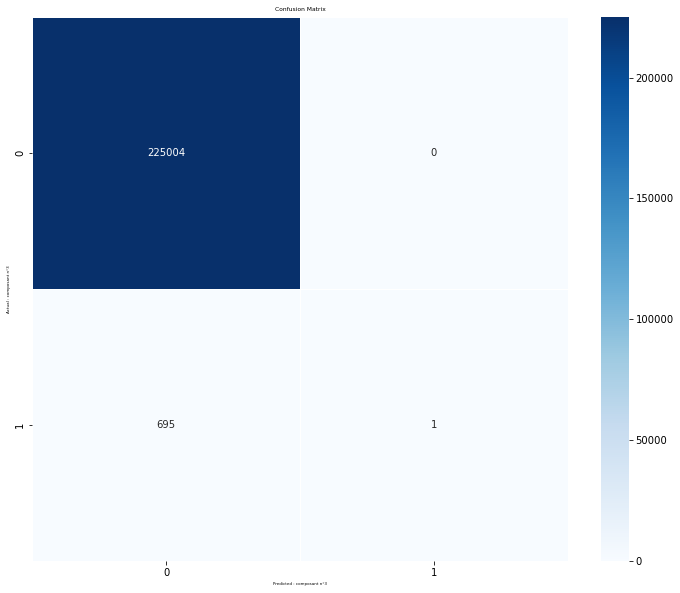

Accuracy :  0.9969206911829863
Recall :  0.0014367816091954023
Precision :  1.0
F1 score :  0.0028694404591104736


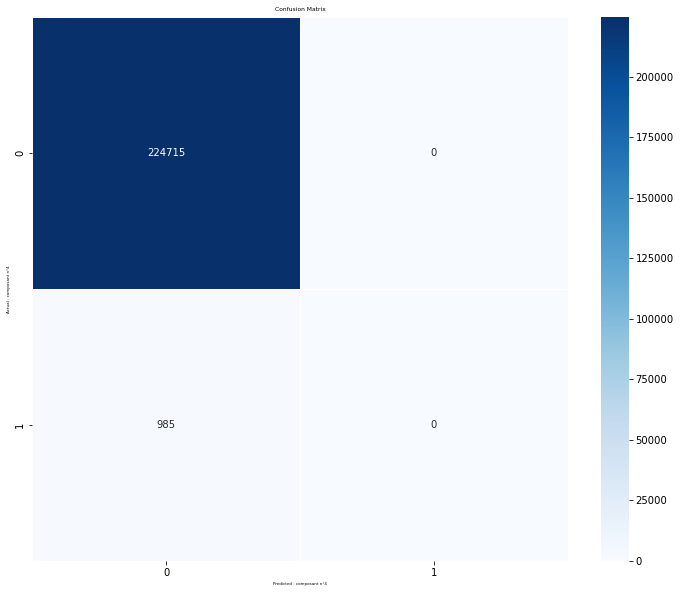

Accuracy :  0.9956357997341604
Recall :  0.0
Precision :  nan
F1 score :  nan


C:\Users\nrp\AppData\Local\Temp/ipykernel_24524/546963598.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = (cm[1][1]/(cm[1][1]+cm[1][0]))


In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#plotting the cm
import seaborn as sns
import matplotlib.pyplot as plt
def conf_mat(y_true , y_pred_classes , name):
  cm = confusion_matrix(y_true,y_pred_classes)
  plt.figure(figsize = (12, 10))
  cm = pd.DataFrame(cm , index = [0,1] , columns = [0,1])
  sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
  plt.title('Confusion Matrix', size=6)
  plt.xlabel('Predicted : '+name , size=4)
  plt.ylabel('Actual : '+name ,size=4)
  plt.show()
  return cm
def performance(cm):
  #Accuracy
  print('Accuracy : ', (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][0]+cm[0][1]+cm[1][1]))
  #Recall
  recall = (cm[1][1]/(cm[1][1]+cm[0][1]))
  print('Recall : ', recall )
  #Precision
  precision = (cm[1][1]/(cm[1][1]+cm[1][0]))
  print('Precision : ', precision )
  #F1 Score
  print('F1 score : ',2*precision*recall/(precision+recall))
performance(conf_mat(y_true_comp1 , y_pred_classes_comp1 , 'composant n°1'))
performance(conf_mat(y_true_comp2 , y_pred_classes_comp2 , 'composant n°2'))
performance(conf_mat(y_true_comp3 , y_pred_classes_comp3 , 'composant n°3'))
performance(conf_mat(y_true_comp4 , y_pred_classes_comp4 , 'composant n°4'))

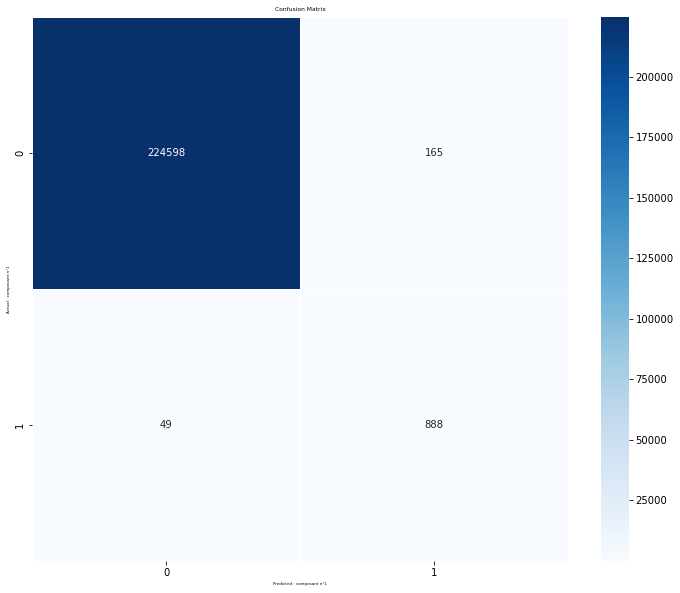

Accuracy :  0.9990518387239699
Recall :  0.9477054429028815
Precision :  0.8433048433048433
F1 score :  0.892462311557789


In [41]:
performance(conf_mat(y_true_comp1 , y_pred_classes_comp1 , 'composant n°1'))


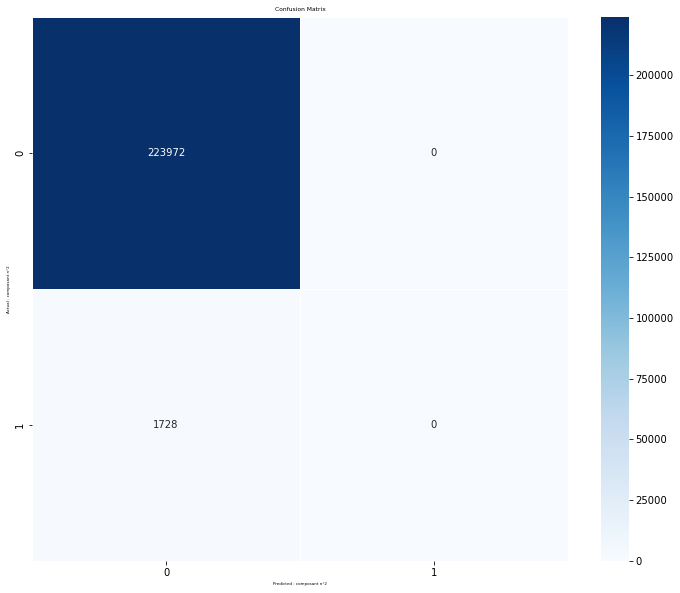

Accuracy :  0.9923438192290651
Recall :  0.0
Precision :  nan
F1 score :  nan


C:\Users\nrp\AppData\Local\Temp/ipykernel_24524/546963598.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = (cm[1][1]/(cm[1][1]+cm[1][0]))


In [42]:
performance(conf_mat(y_true_comp2 , y_pred_classes_comp2 , 'composant n°2'))


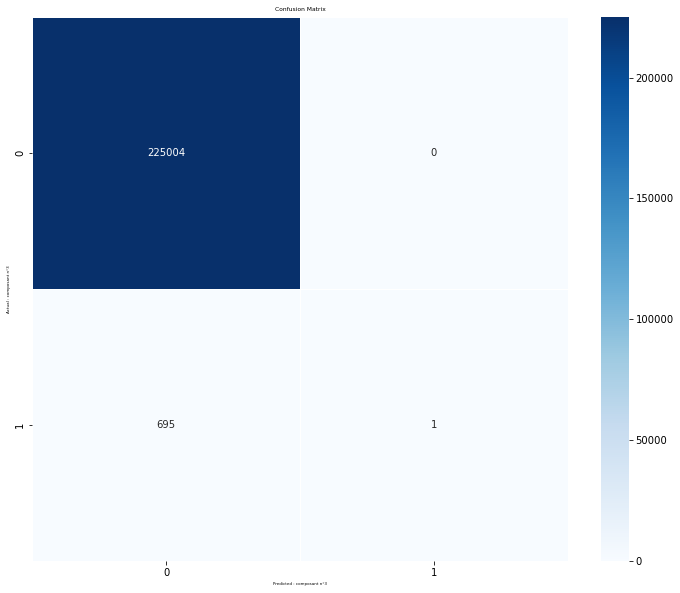

Accuracy :  0.9969206911829863
Recall :  0.0014367816091954023
Precision :  1.0
F1 score :  0.0028694404591104736


In [43]:
performance(conf_mat(y_true_comp3 , y_pred_classes_comp3 , 'composant n°3'))


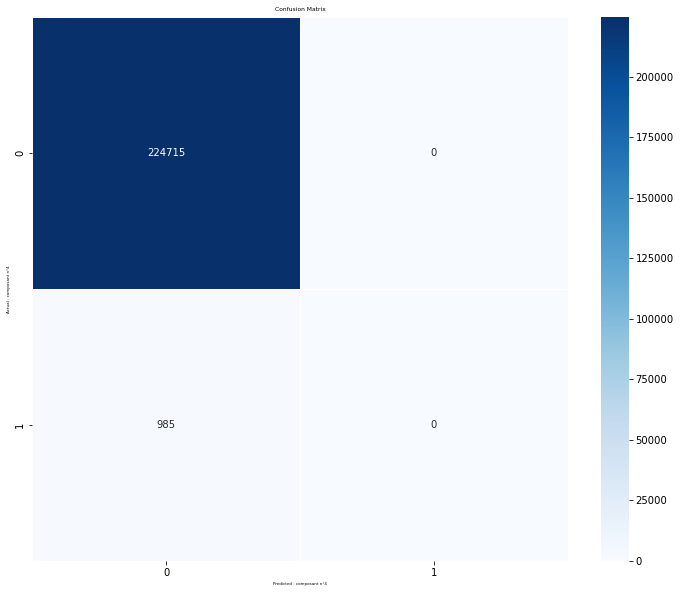

Accuracy :  0.9956357997341604
Recall :  0.0
Precision :  nan
F1 score :  nan


C:\Users\nrp\AppData\Local\Temp/ipykernel_24524/546963598.py:23: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = (cm[1][1]/(cm[1][1]+cm[1][0]))


In [44]:
performance(conf_mat(y_true_comp4 , y_pred_classes_comp4 , 'composant n°4'))

In [27]:
def prob_failure(machine_id , comp):
    machine_df=test[test.machineID==machine_id]
    machine_test=gen_sequence(machine_df,day,seq_cols)
    m_pred=model.predict(machine_test)
    failure_prob=list(m_pred[comp][-1]*100)[0]
    print('the probability of failure of comp number ' , comp+1 ,'corresponding to machine number ' ,machine_id ,' is : ' , failure_prob)

In [36]:
# Pass machine id and component id
prob_failure(80,0)

the probability of failure of comp number  1 corresponding to machine number  80  is :  1.8128365


In [38]:
# serialize model to JSON
model_json = model.to_json()
with open("data/model/predictive_maint.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to storage
model.save_weights("data/model/predictive_maint.h5")
print("Saved model to disk")

Saved model to disk


In [39]:
from keras.models import model_from_json
# later...
 
# load json and create model
json_file = open('data/model/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("data/model/predictive_maint.h5")
print("Loaded model from disk")

Loaded model from disk
